# Import the dependencies

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import warnings
warnings.filterwarnings('ignore')
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math as math
from matplotlib import animation, rc
from IPython.display import HTML, Image

In [3]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

# Plotting snapshots

In [4]:
def plot(s,r):
    theta = np.linspace(0,1,100)
    theta = theta * 2*22.0/7.
    x = 49.0+25.0*np.sin(theta)
    y = 99.0+25.0*np.cos(theta)
    for i in range(r):
        plt.figure(figsize = (20,50))
        plt.imshow(np.real(s[:,:,i].T),cmap='hsv')
        plt.fill(x,y)
        #filename = './fig/out'+str(i)+'.png'
        #plt.savefig(filename,bbox_inches="tight")
        plt.show()  
        

# Read the simulation results

In [5]:
contents=sio.loadmat('./data/CYLINDER_ALL.mat')
nx,ny,m,n = contents['nx'],contents['ny'],contents['m'],contents['n']
VORTALL = contents['VORTALL']
X  = VORTALL[:,:]
m, n = np.asscalar(m), np.asscalar(n)
nx, ny = np.asscalar(nx), np.asscalar(ny) 
print(X.shape)

(89351, 151)


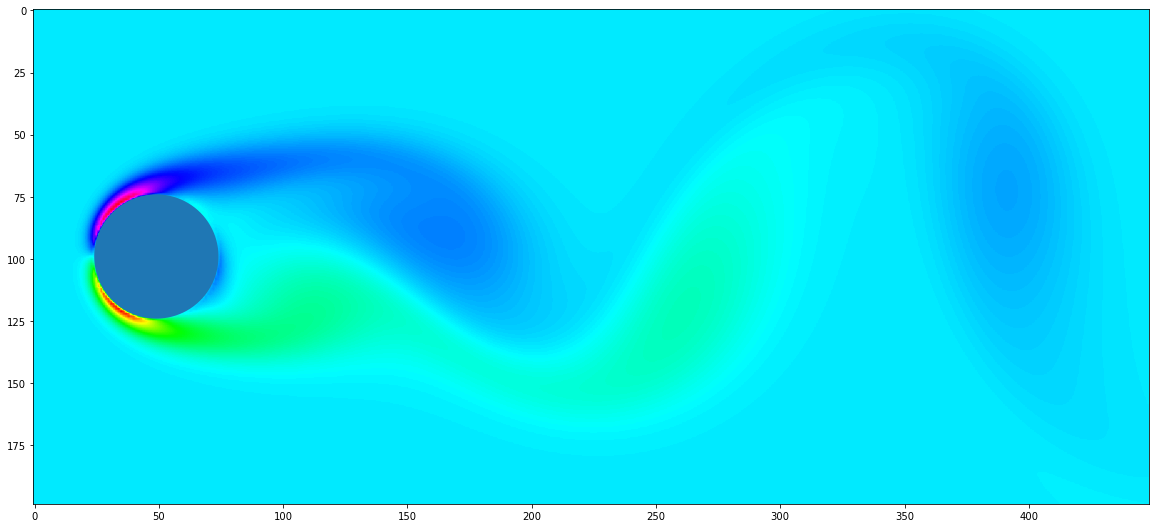

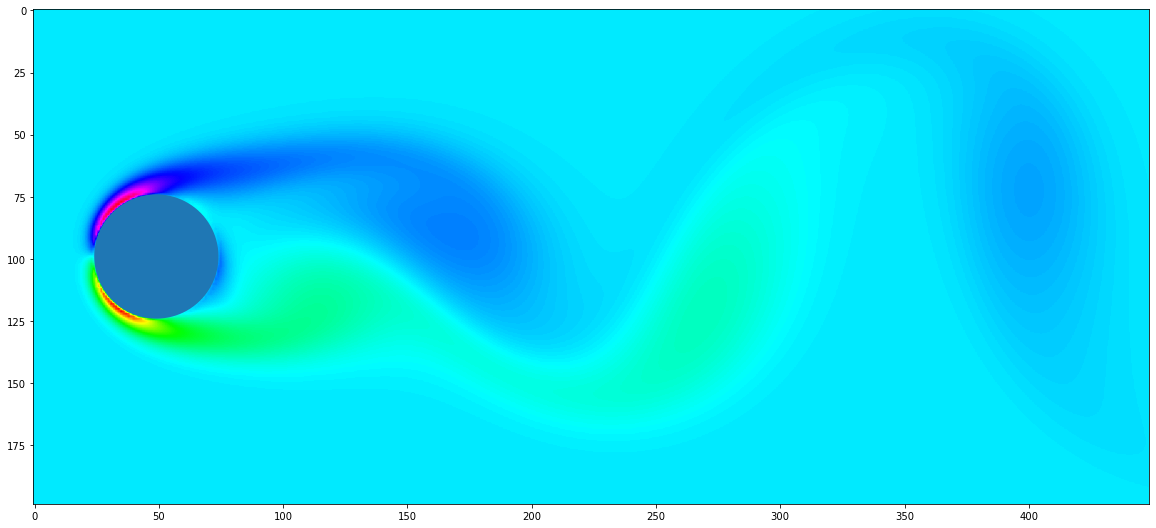

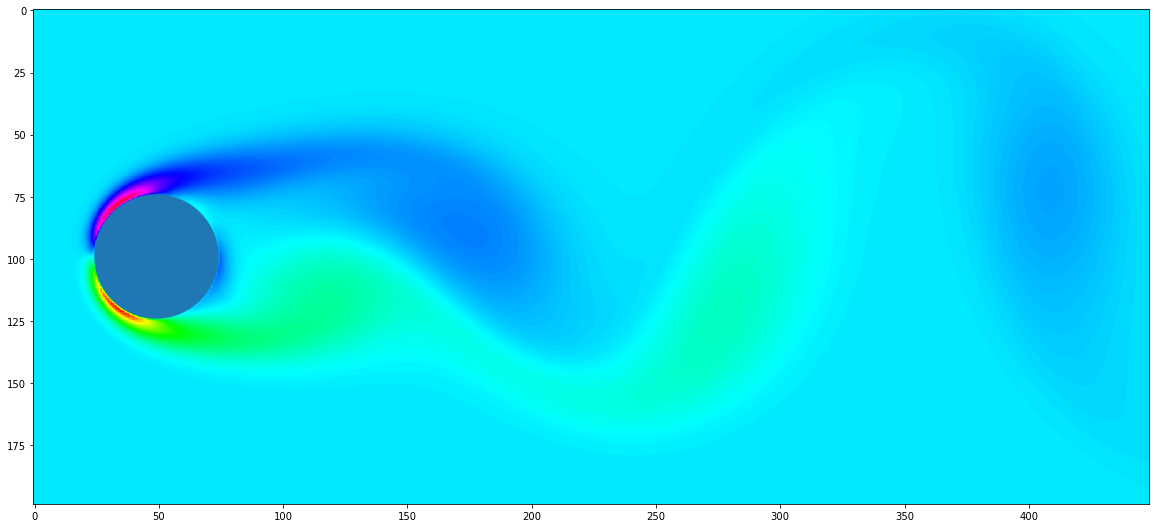

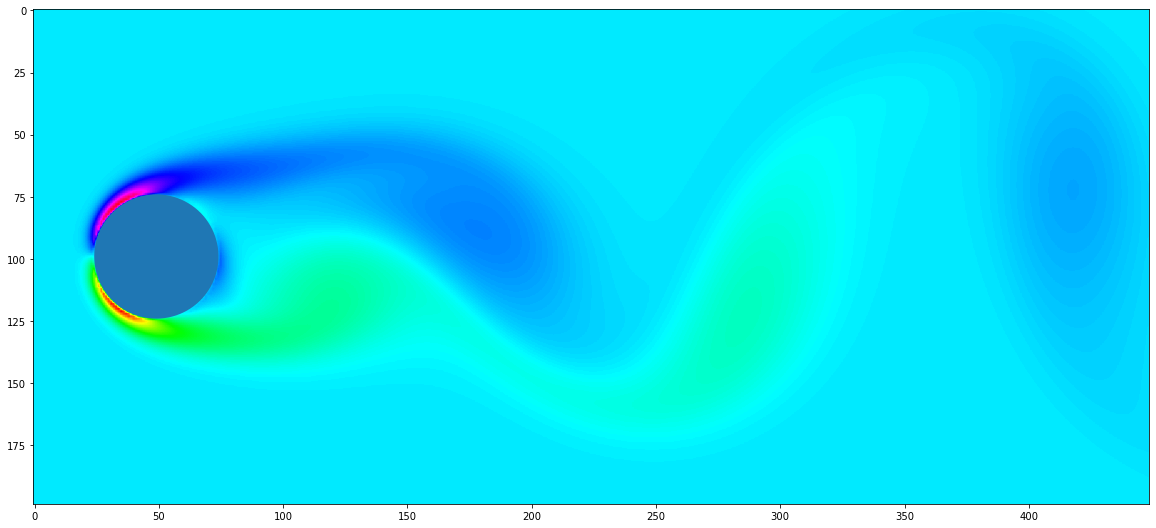

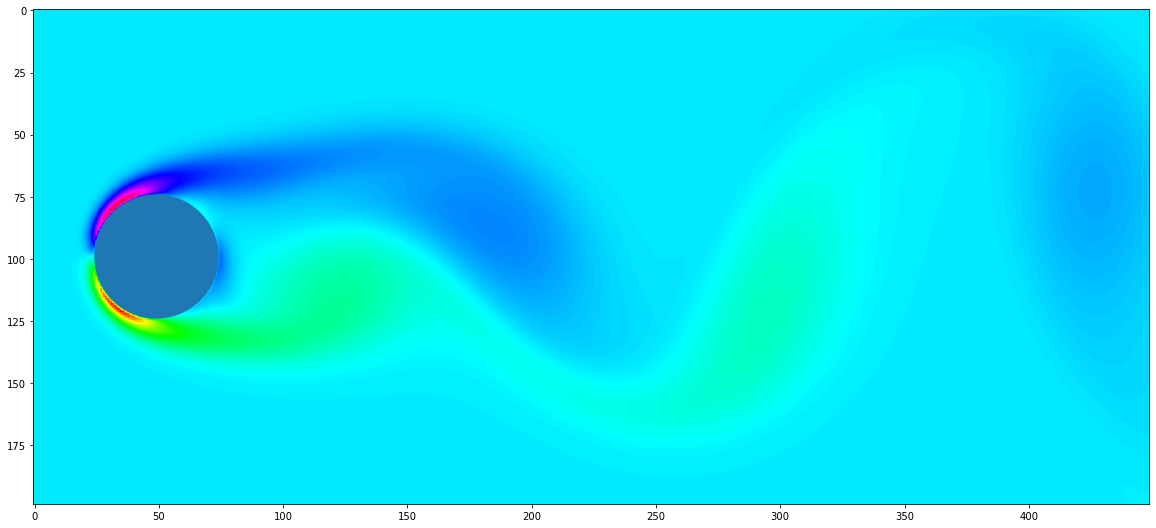

In [6]:
Xorg = np.reshape(X,(ny,nx,151))
plot(Xorg,5)

In [7]:
from sklearn.decomposition import PCA
pca = PCA()  # project from 64 to 2 dimensions
score=pca.fit_transform(X)
coeff=pca.components_ #eigen vectors.T
latent = pca.explained_variance_
explained = pca.explained_variance_ratio_
Phi = np.reshape(score,(ny,nx,151))

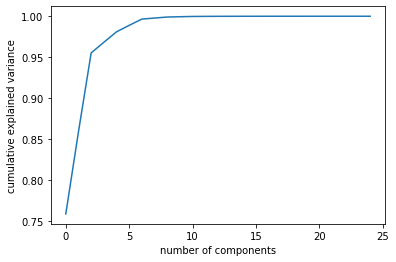

In [8]:
plt.plot(np.cumsum(pca.explained_variance_ratio_[0:25]))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

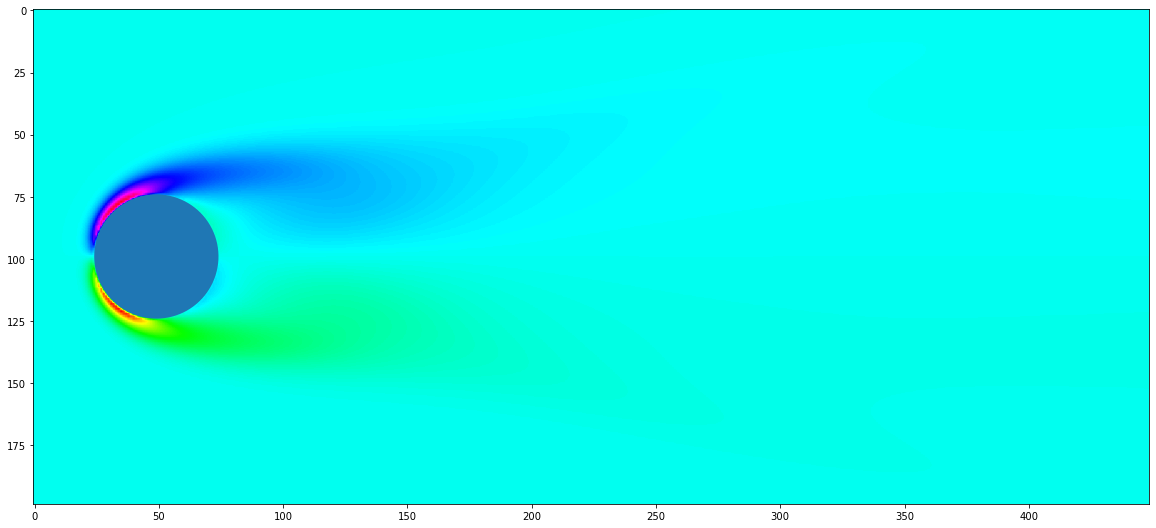

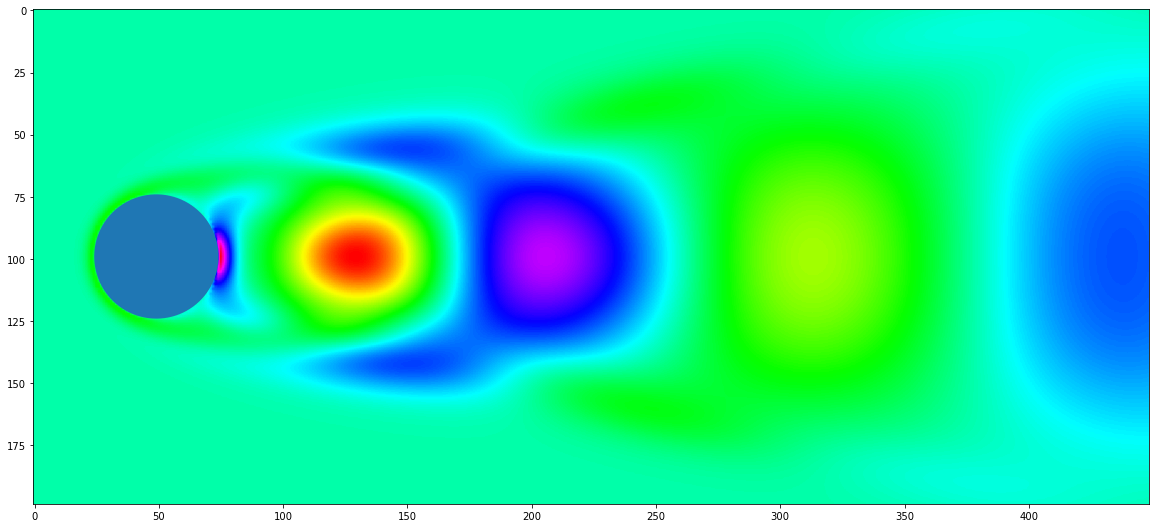

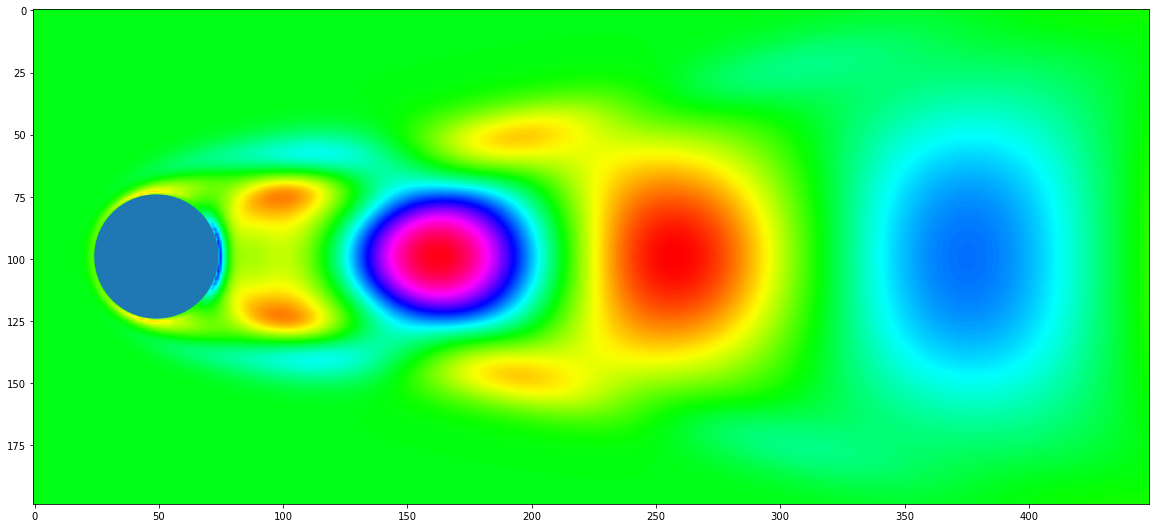

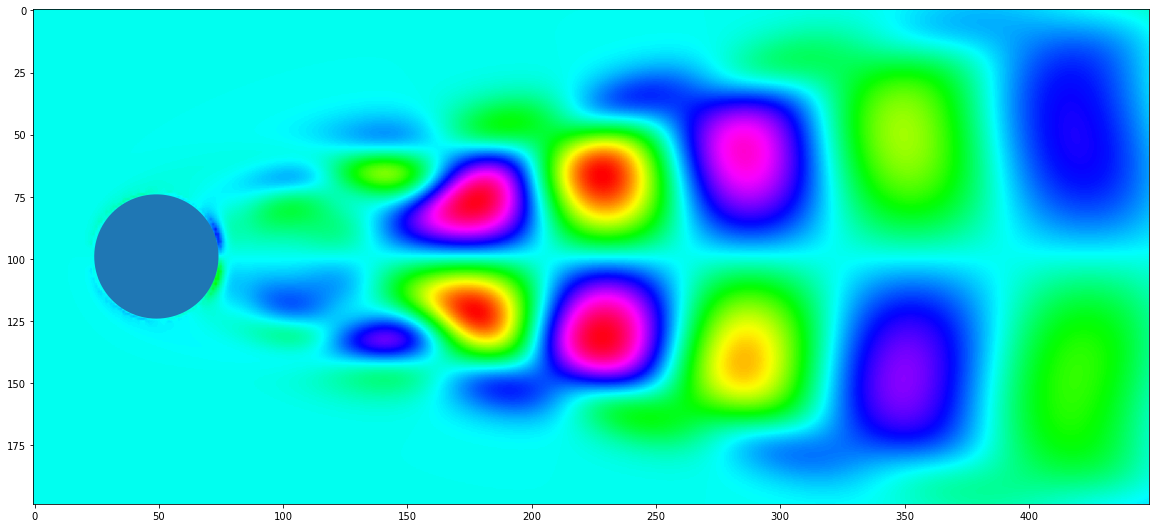

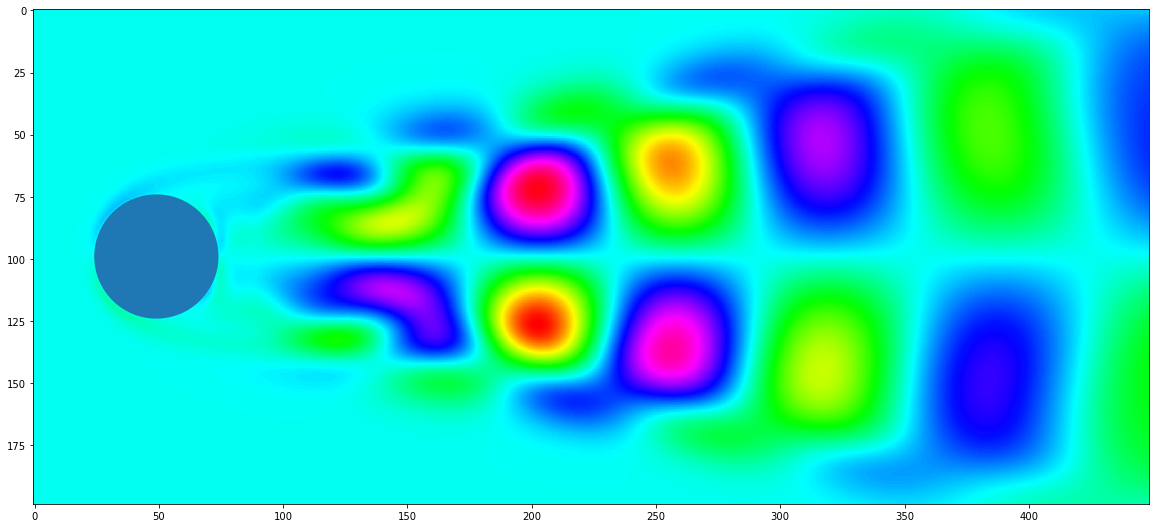

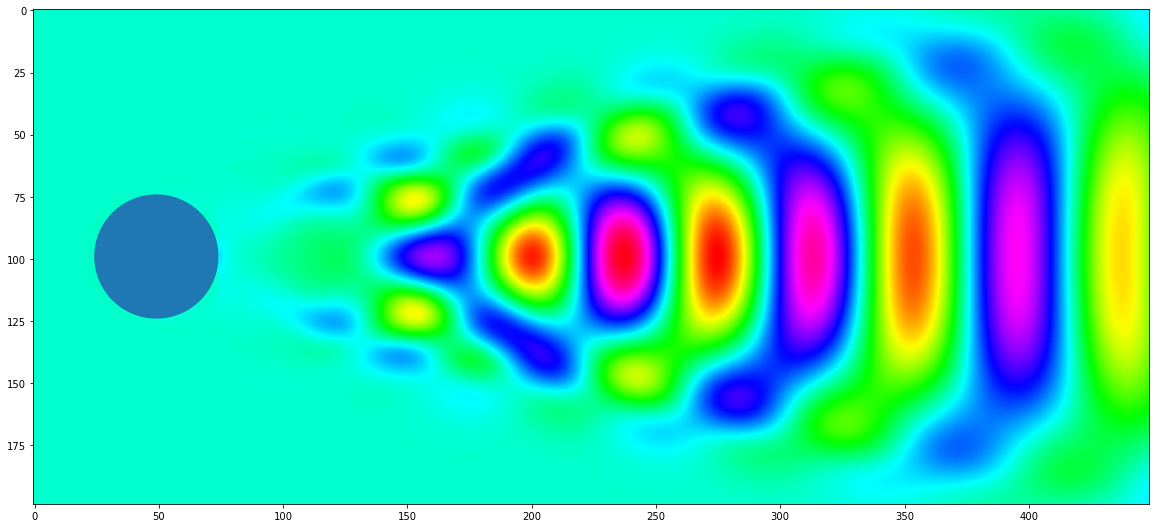

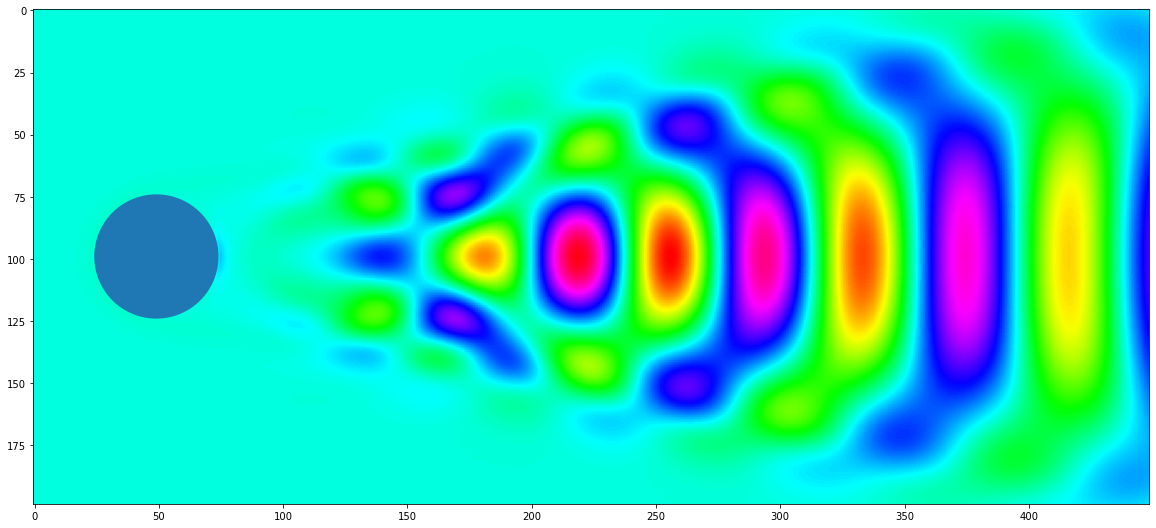

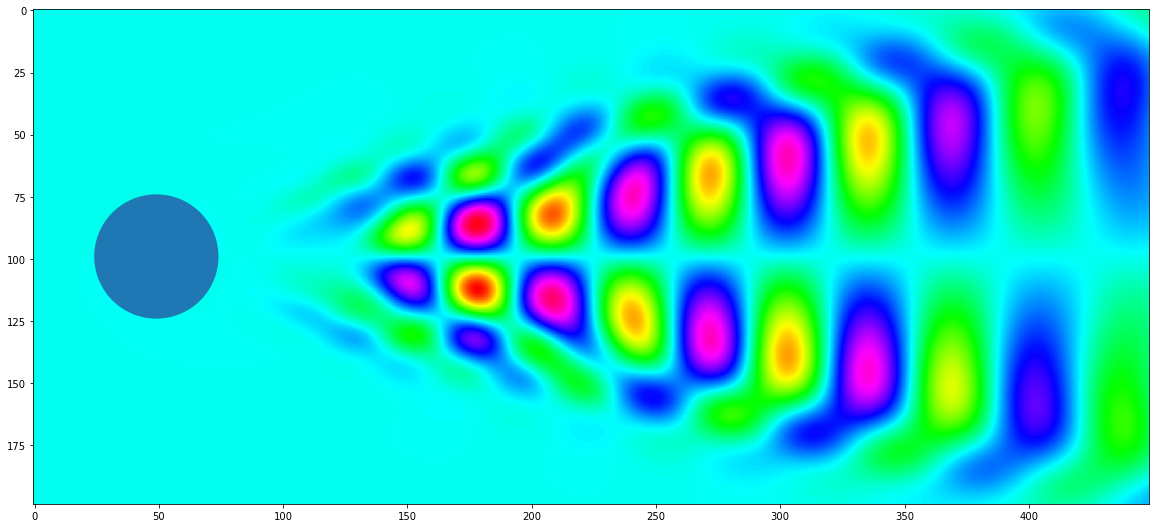

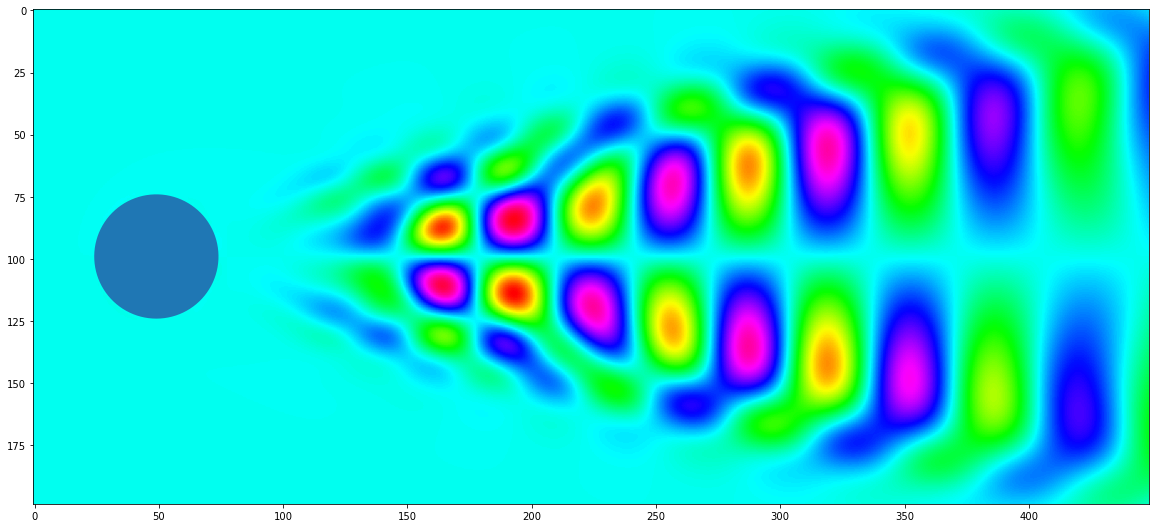

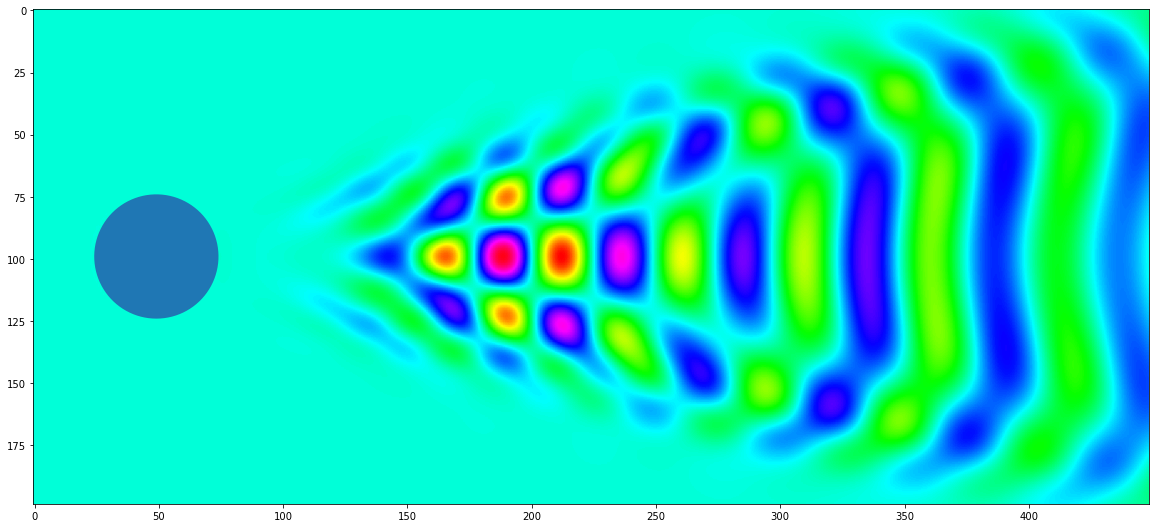

In [9]:
plot(Phi,10)